<a href="https://www.kaggle.com/code/poushal02/academicstress?scriptVersionId=259565446" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🧾 Guide notebook for the dataset of academic stress analysis 

## 🔃 Load the dataset 

This notebook uses the 2nd version of the dataset, where 140 real-world data points are available. Currently, the Google Form, which I used to collect the data there are few more data points which will be available in the next monthly maintainance.

In [1]:
import pandas as pd
import seaborn as sns


df = pd.read_csv("/kaggle/input/student-academic-stress-real-world-dataset/academic Stress level - maintainance 1.csv")
df.head()

,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5


Renamed the column names from Google Form question to meaningful features

In [2]:
df.rename(columns={
    "Your Academic Stage": "Academic Stage",
    "Academic pressure from your home": "Household Stress",
    "What coping strategy you use as a student?": "Coping strategy",
    "Do you have any bad habits like smoking, drinking on a daily basis?": "Bad habits",
    "What would you rate the academic  competition in your student life": "Competition",
    "Rate your academic stress index ": "Stress"
    
}, inplace=True)

In [3]:
df.head()

,Timestamp,Academic Stage,Peer pressure,Household Stress,Study Environment,Coping strategy,Bad habits,Competition,Stress
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5


**The timestamp column is not needed at all**

In [4]:
df.drop('Timestamp', axis=1, inplace=True)

In [5]:
df.head()

,Academic Stage,Peer pressure,Household Stress,Study Environment,Coping strategy,Bad habits,Competition,Stress
0,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5


## 🔍 Check for the missing values in the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Academic Stage     140 non-null    object
 1   Peer pressure      140 non-null    int64 
 2   Household Stress   140 non-null    int64 
 3   Study Environment  139 non-null    object
 4   Coping strategy    140 non-null    object
 5   Bad habits         140 non-null    object
 6   Competition        140 non-null    int64 
 7   Stress             140 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 8.9+ KB


**There is a missing value in the Study Environment column**

**Fixing the missing data point with the mode of that column**

In [7]:
df['Study Environment'].mode()

0    Peaceful
Name: Study Environment, dtype: object

In [8]:
df.loc[df['Study Environment'].isna(), 'Study Environment'] = "Peaceful"

# 🧹 Data Preprocessing Stage

**I am using my own definition for categorizing the column data instead of using LabelEncoder because I want to control what values to give to which column. You can also map using encoders from SKlearn.**

## 💻 Study Environment 

In [9]:
df['Study Environment'].unique()

array(['Noisy', 'Peaceful', 'disrupted'], dtype=object)

In [10]:
map_env = {
    "Peaceful": 2,
    "disrupted": 1,
    "Noisy": 0
}
df['Study Environment'] = df['Study Environment'].map(map_env)

## ✏️ Academic Stage

In [11]:
df['Academic Stage'].unique()

array(['undergraduate', 'high school', 'post-graduate'], dtype=object)

In [12]:
map_ac_stage = {
    "undergraduate": 1,
    "high school": 0,
    "post-graduate": 2,
}
df['Academic Stage'] = df['Academic Stage'].map(map_ac_stage)

## 🥷🏽 Coping Strategy

In [13]:
df['Coping strategy'].unique()

array(['Analyze the situation and handle it with intellect',
       'Social support (friends, family)',
       'Emotional breakdown (crying a lot)'], dtype=object)

In [14]:
map_coping = {
    "Analyze the situation and handle it with intellect": 2,
    "Social support (friends, family)": 1,
    "Emotional breakdown (crying a lot)": 0
}
df['Coping strategy'] = df['Coping strategy'].map(map_coping)

## 🚭 Bad Habits

In [15]:
df['Bad habits'].unique()

array(['No', 'prefer not to say', 'Yes'], dtype=object)

In [16]:
map_habits = {
    "No": 0,
    "Yes": 1,
    "prefer not to say": 2
}
df['Bad habits'] = df['Bad habits'].map(map_habits)

# 🤩 Cleaned data with all numerical values

In [17]:
df.head()

,Academic Stage,Peer pressure,Household Stress,Study Environment,Coping strategy,Bad habits,Competition,Stress
0,1,4,5,0,2,0,3,5
1,1,3,4,2,2,0,3,3
2,1,1,1,2,1,0,2,4
3,1,3,2,2,2,0,4,3
4,1,3,3,2,2,0,4,5


# 🤩 No Missing Values

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Academic Stage     140 non-null    int64
 1   Peer pressure      140 non-null    int64
 2   Household Stress   140 non-null    int64
 3   Study Environment  140 non-null    int64
 4   Coping strategy    140 non-null    int64
 5   Bad habits         140 non-null    int64
 6   Competition        140 non-null    int64
 7   Stress             140 non-null    int64
dtypes: int64(8)
memory usage: 8.9 KB


# 🃏 Removed Duplicate instances

In [19]:
df[df.duplicated()]

,Academic Stage,Peer pressure,Household Stress,Study Environment,Coping strategy,Bad habits,Competition,Stress
22,1,3,3,2,2,0,4,3
25,1,4,3,2,2,0,4,4
45,1,3,2,2,2,0,4,3
50,1,3,3,2,2,0,4,3
73,1,3,3,1,2,0,4,4
77,1,3,4,2,2,0,3,3
108,0,3,3,2,2,0,3,4
135,1,3,2,2,2,0,3,4


In [20]:
df = df.drop_duplicates(keep="last")

In [21]:
df.duplicated().sum()

0

# 🤖 Current Shape

In [22]:
df.shape

(132, 8)

# 👩🏽‍🔬 Exploratory Data Analysis

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency
from itertools import combinations

def EDA(df):
    # Distribution plots for each categorical column
    for col in df.columns:
        plt.figure(figsize=(8,4))
        sns.countplot(x=col, data=df, palette='pastel')
        plt.title(f'Distribution of {col}')
        plt.show()
    
    # Correlation matrix using Cramer's V for categorical data
    def cramers_v(x, y):
        confusion_matrix = pd.crosstab(x, y)
        chi2_val, p, dof, expected = chi2_contingency(confusion_matrix)
        n = confusion_matrix.sum().sum()
        phi2 = chi2_val / n
        r, k = confusion_matrix.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
        rcorr = r - ((r-1)**2) / (n-1)
        kcorr = k - ((k-1)**2) / (n-1)
        return (phi2corr / min((kcorr-1), (rcorr-1)))**0.5

    cramers_results = pd.DataFrame(index=df.columns, columns=df.columns, dtype=float)
    for col1 in df.columns:
        for col2 in df.columns:
            cramers_results.loc[col1, col2] = cramers_v(df[col1], df[col2])
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cramers_results.astype(float), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Cramer's V Correlation Heatmap for Categorical Encoded Data")
    plt.show()
    
    # Pairwise count plots for some column pairs (first 5 pairs)
    pairs = list(combinations(df.columns, 2))[:5]
    for col1, col2 in pairs:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=col1, hue=col2, data=df, palette='muted')
        plt.title(f'Distribution of {col1} by {col2}')
        plt.legend(title=col2, bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()

print("Function loaded ready to analyze...")


Function loaded ready to analyze...


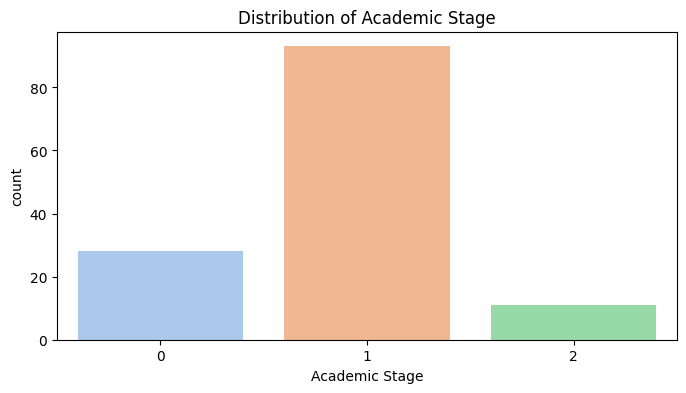

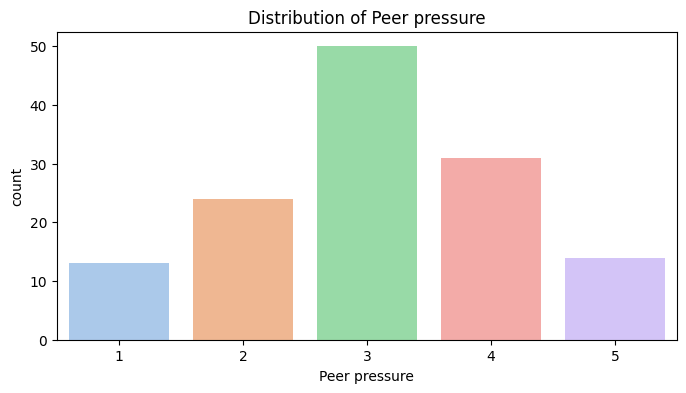

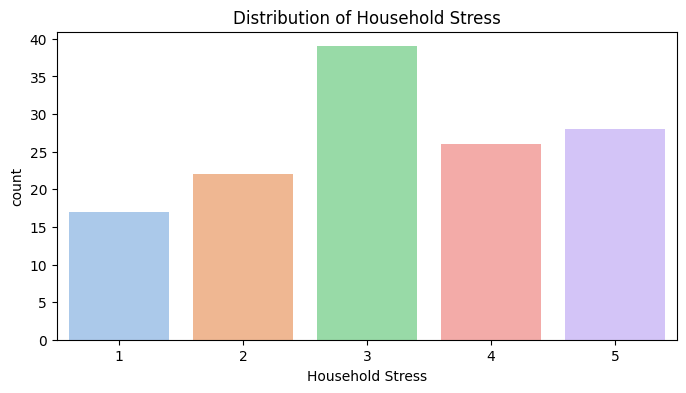

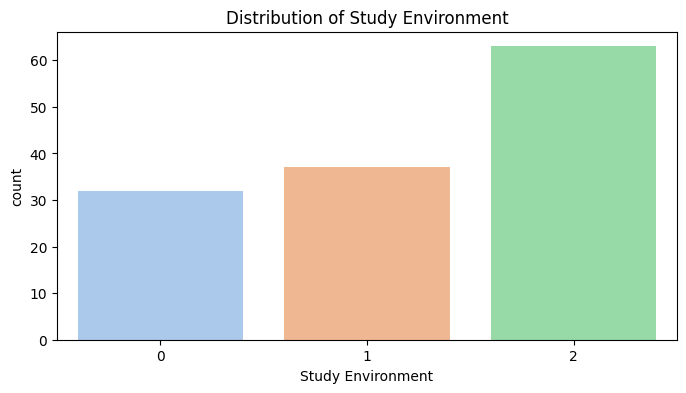

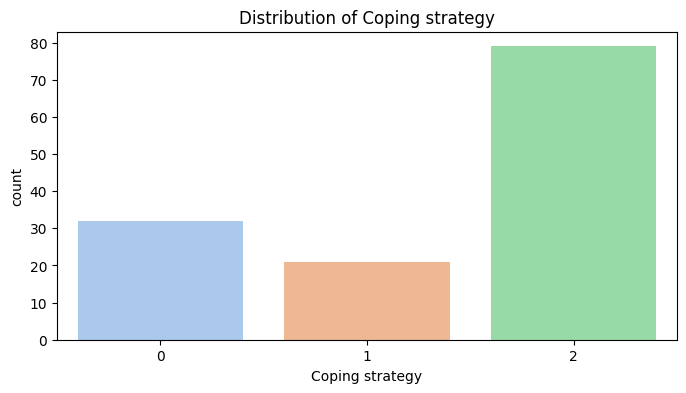

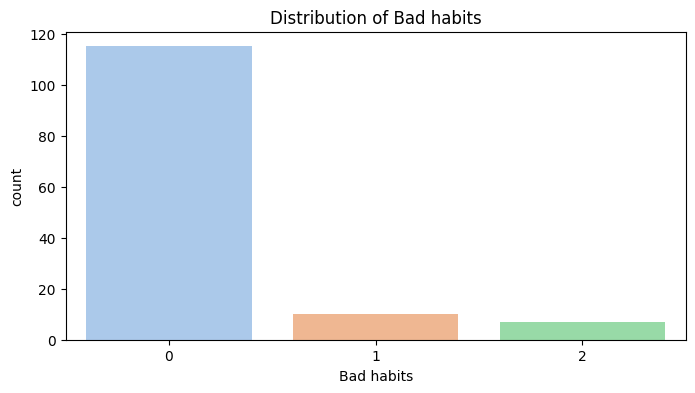

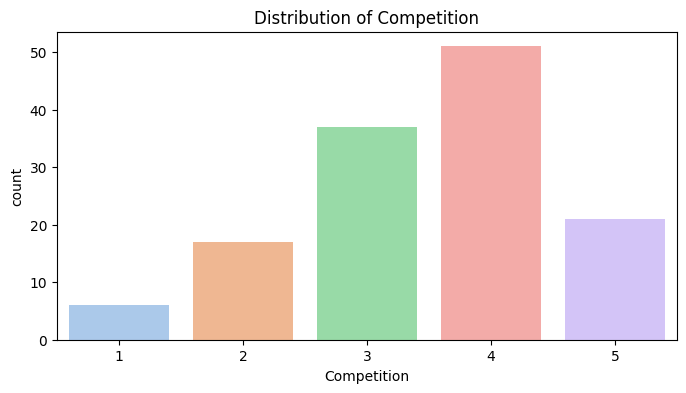

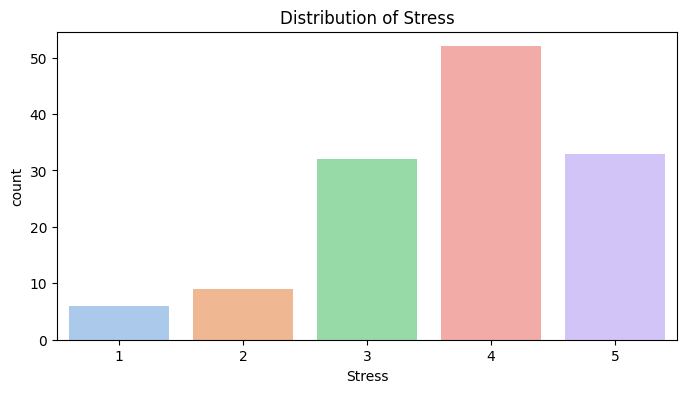

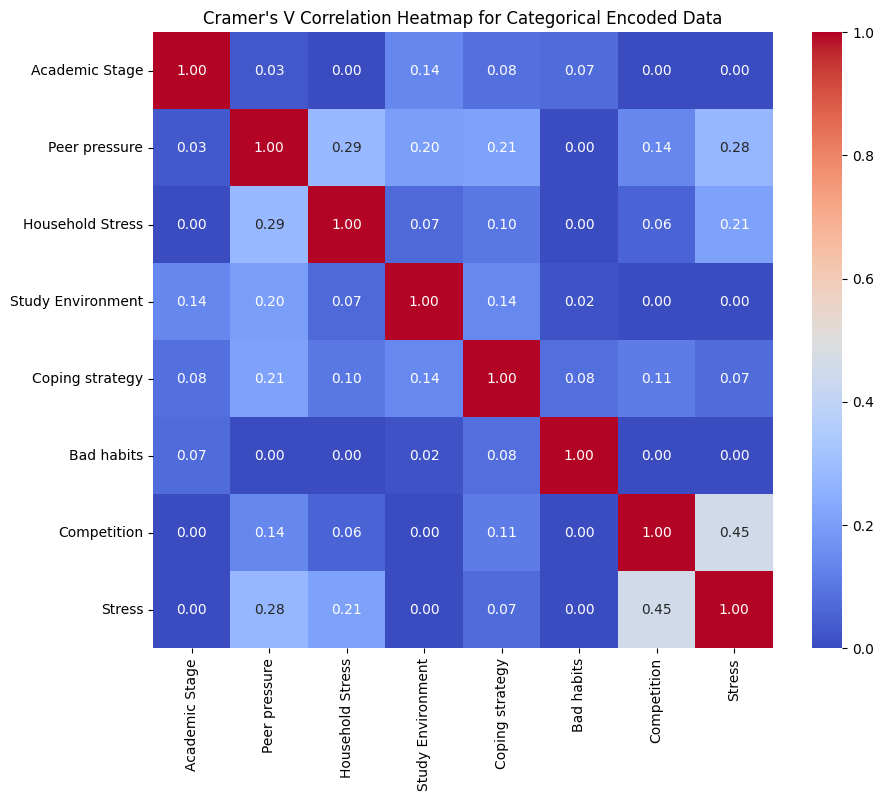

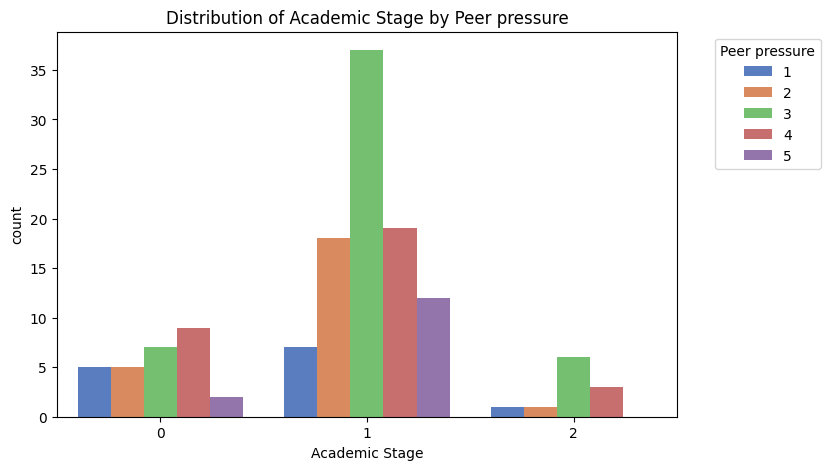

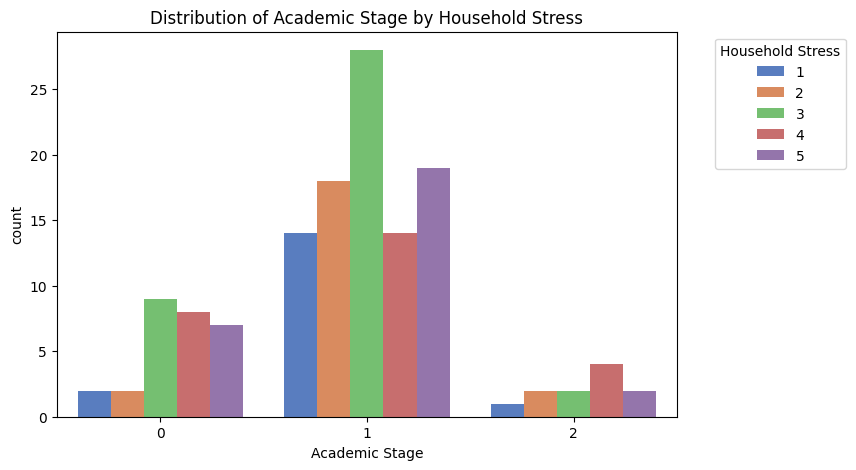

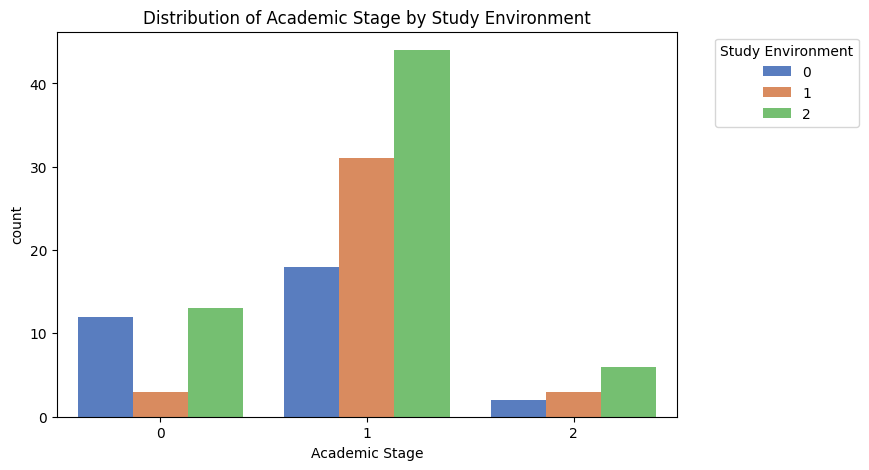

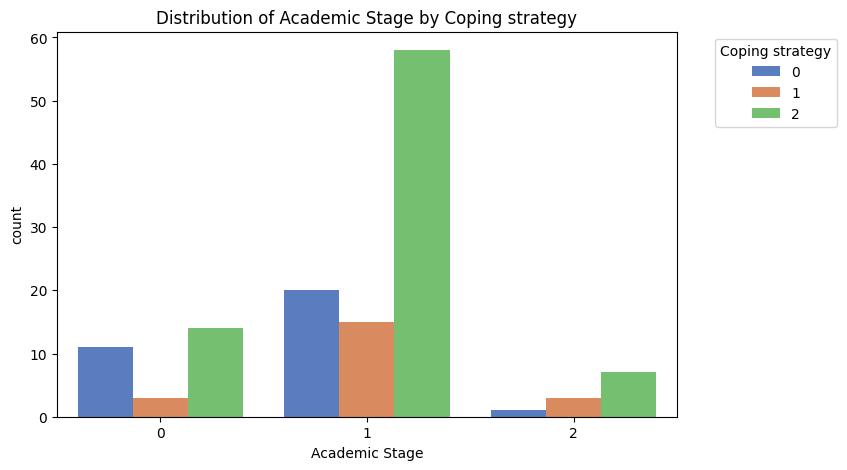

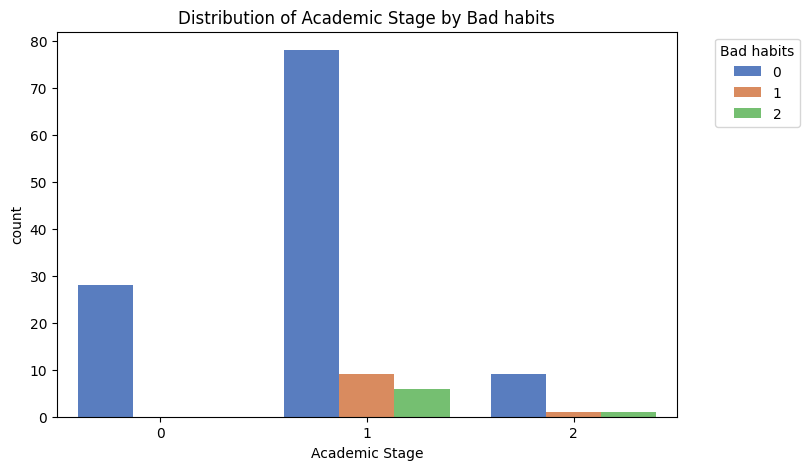

In [24]:
EDA(df)